# MFCCs and RPCCs for 'Happy' and 'Sad'

In this notebook I study the MFCCs and RPCCs distributions calculated from two audio files corresponding to emotions 'happy' and 'sad'. <br>

## Importing required libraries

In [1]:
import sys
import pandas as pd
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd

sys.path.append('../')

from aux.reader import read_data
from residualphase import residual_phase

Using TensorFlow backend.


## Loading data

In [2]:
DATA_PATH = '../data/'
data_df = read_data(DATA_PATH)

# filter male speakers
data_df = data_df[data_df['gender']=='male']

# filter 'happy' and 'sad' emotions.
df_happy = data_df[data_df.emotion=='happy']
df_sad = data_df[data_df.emotion=='sad']

We are going to use some functions defined in the previous notebook.

In [3]:
def _calculate_cepstral_coefs(samples, sr):
    ccs = librosa.feature.mfcc(samples, n_mfcc=13)
    return librosa.feature.delta(ccs, order=2)

def cepstral_coefs(fname):
    samples, sr = librosa.load('../data/' + fname)
    
    # trim signal
    samples, _ = librosa.effects.trim(samples, top_db=30)
    
    # normalize signal
    samples = librosa.util.normalize(samples)

    # residual phase calculation
    res_phase = residual_phase(samples)

    mfccs = _calculate_cepstral_coefs(samples, sr)
    rpccs = _calculate_cepstral_coefs(res_phase, sr)
    
    return mfccs, rpccs

## Spectrograms of different emotions 

Let's listen to some audio samples tagged as 'happy' and 'sad'.

In [4]:
print()
print('happy samples')
fname_h1 = '../data/Actor_01/03-01-03-01-01-01-01.wav'
samples, sample_rate = librosa.load(fname_h1)
display(ipd.Audio(samples, rate=sample_rate))

fname_h2 = '../data/Actor_01/03-01-03-01-01-02-01.wav'
samples, sample_rate = librosa.load(fname_h2)
display(ipd.Audio(samples, rate=sample_rate))

print()
print('sad samples')
fname_s1 = '../data/Actor_01/03-01-04-01-01-01-01.wav'
samples, sample_rate = librosa.load(fname_s1)
display(ipd.Audio(samples, rate=sample_rate))

fname_s2 = '../data/Actor_01/03-01-04-01-01-02-01.wav'
samples, sample_rate = librosa.load(fname_s2)
display(ipd.Audio(samples, rate=sample_rate))


happy samples



sad samples


Listening carefully to each audio we can try to recognize changes in glottal sound for different emotions present in the utterances.

### Cepstral coeffiicients distribution

I am going to plot the MFCCs and RPCCs distributions. <br>
In order to do so, I first aggregate the MFCCs and RPCCs calculated on each audio file corresponding to speaker emotion 'happy' and 'sad'.

In [5]:
# happy

mfcc_vec_happy, rpcc_vec_happy = [], []
for fname in df_happy['path']:
    mfcc, rpcc = cepstral_coefs(fname)

    mfcc_vec_happy.append(mfcc.mean(axis=1))
    rpcc_vec_happy.append(rpcc.mean(axis=1))
    
mfcc_vec_happy = np.array(mfcc_vec_happy)
rpcc_vec_happy = np.array(rpcc_vec_happy)

# sad

mfcc_vec_sad, rpcc_vec_sad = [], []
for fname in df_sad['path']:
    mfcc, rpcc = cepstral_coefs(fname)

    mfcc_vec_sad.append(mfcc.mean(axis=1))
    rpcc_vec_sad.append(rpcc.mean(axis=1))
    
mfcc_vec_sad = np.array(mfcc_vec_sad)
rpcc_vec_sad = np.array(rpcc_vec_sad)

From the aggregate data of the MFCCs and RPCCs I compute the mean and standard deviation for each emotion.

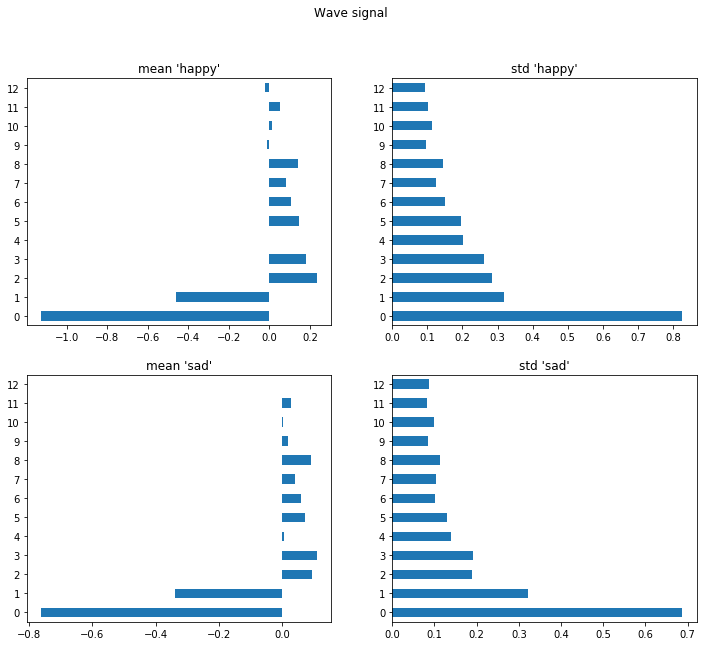

In [6]:
# wave signal

fig = plt.figure(figsize=(12, 10))

plt.subplot(221)
pd.DataFrame(mfcc_vec_happy).mean(axis=0).plot.barh(title="mean 'happy'")

plt.subplot(222)
pd.DataFrame(mfcc_vec_happy).std(axis=0).plot.barh(title="std 'happy'")

plt.subplot(223)
pd.DataFrame(mfcc_vec_sad).mean(axis=0).plot.barh(title="mean 'sad'")

plt.subplot(224)
pd.DataFrame(mfcc_vec_sad).std(axis=0).plot.barh(title="std 'sad'")

plt.suptitle('Wave signal')
plt.show()

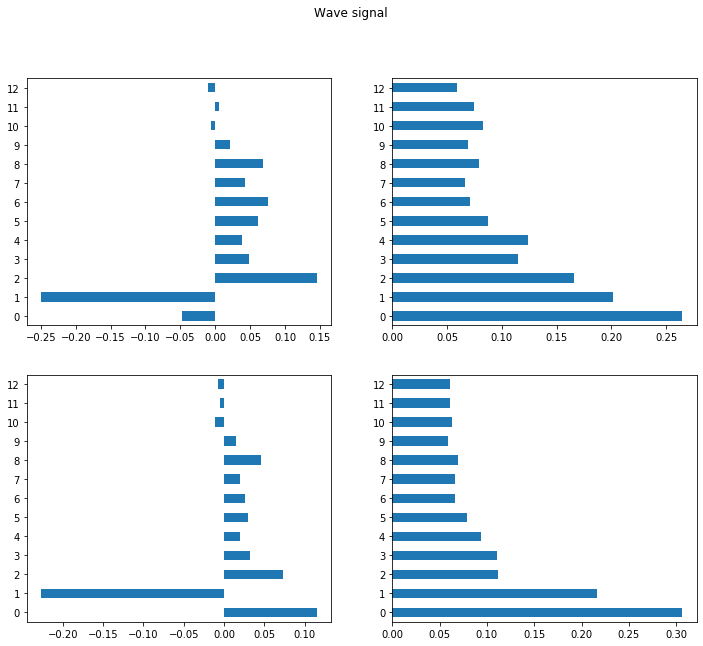

In [7]:
# residual phase

fig = plt.figure(figsize=(12, 10))

plt.subplot(221)
pd.DataFrame(rpcc_vec_happy).mean(axis=0).plot.barh("mean 'happy'")

plt.subplot(222)
pd.DataFrame(rpcc_vec_happy).std(axis=0).plot.barh("std 'happy'")

plt.subplot(223)
pd.DataFrame(rpcc_vec_sad).mean(axis=0).plot.barh("mean 'sad'")

plt.subplot(224)
pd.DataFrame(rpcc_vec_sad).std(axis=0).plot.barh("std 'sad'")

plt.suptitle('Wave signal')
plt.show()

We can observe overall larger difference in the distribution of the Cepstral coefficnets for the residual phase with respect to the two emotions.
The difference is stronger for the lowest Cepstral coefficient where we even observe inversions in intensity. 

Note that the larger variance for lower-order coefficients are probably due to the larger interval in the first Mel Filter bank.

In [8]:
df_mfcc_h = pd.DataFrame(mfcc_vec_happy)
df_rpcc_h = pd.DataFrame(rpcc_vec_happy)

df_mfcc_s = pd.DataFrame(mfcc_vec_sad)
df_rpcc_s = pd.DataFrame(rpcc_vec_sad)

### Plotting the Cepstral coefficient distribution

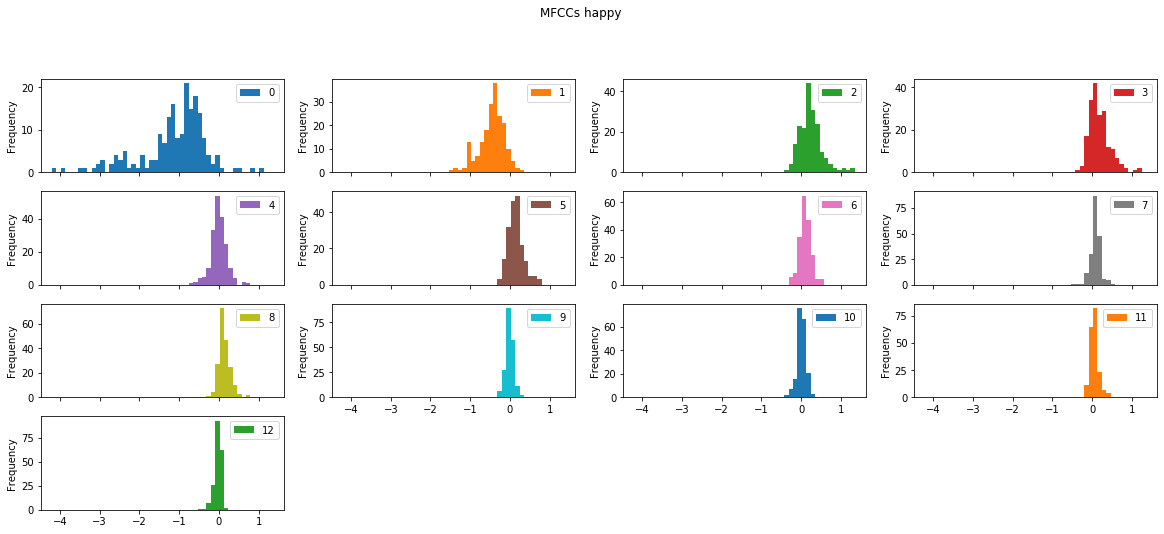

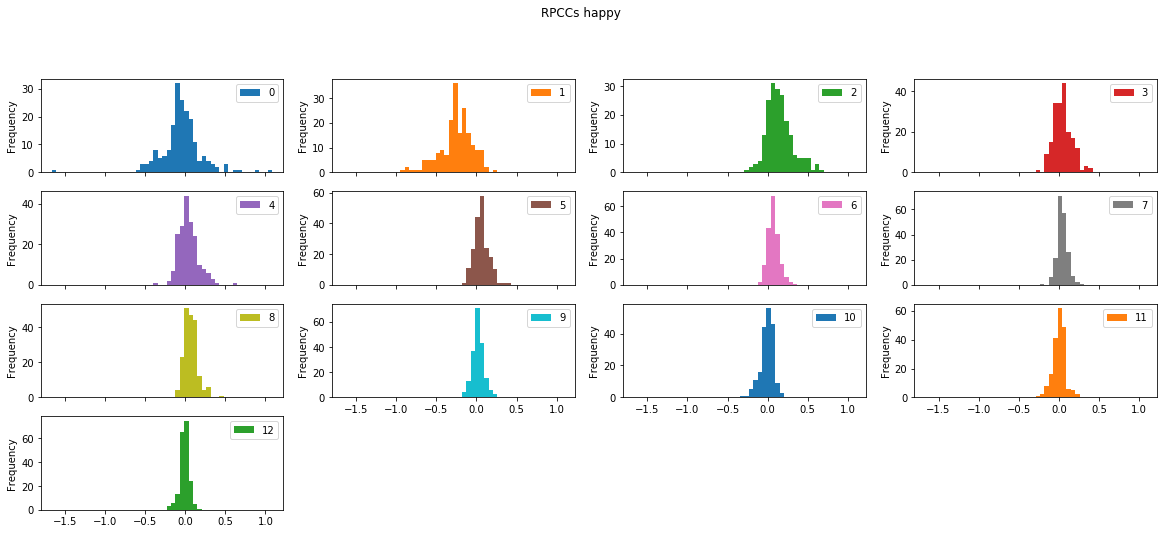

In [9]:
# Happy

df_mfcc_h.plot.hist(subplots=True, layout=(5,4), figsize = (20,10), bins=50, title='MFCCs happy')
plt.show()

df_rpcc_h.plot.hist(subplots=True, layout=(5,4), figsize = (20,10), bins=50, title='RPCCs happy')
plt.show()

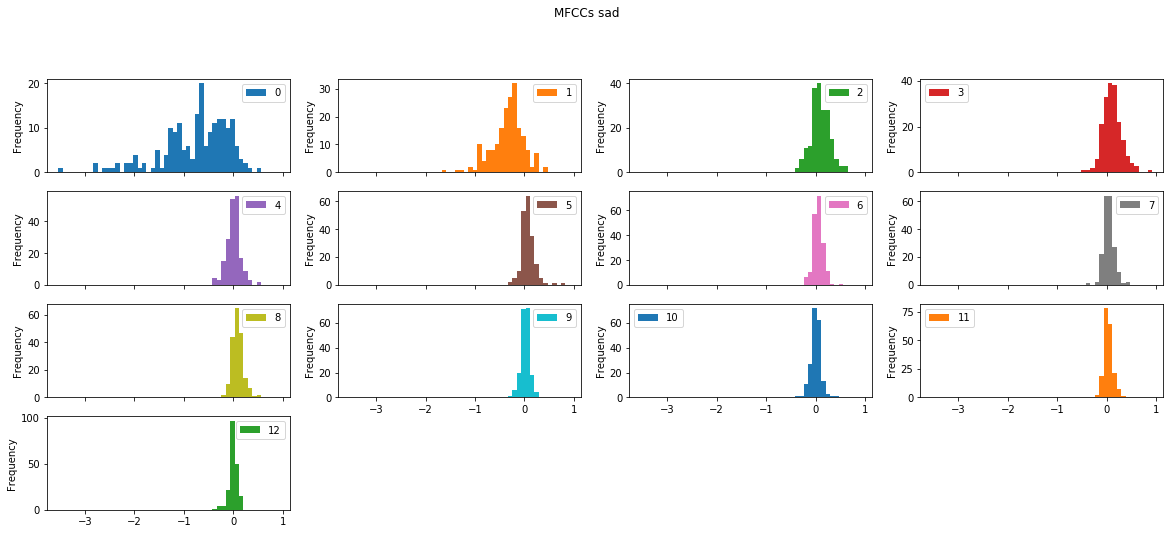

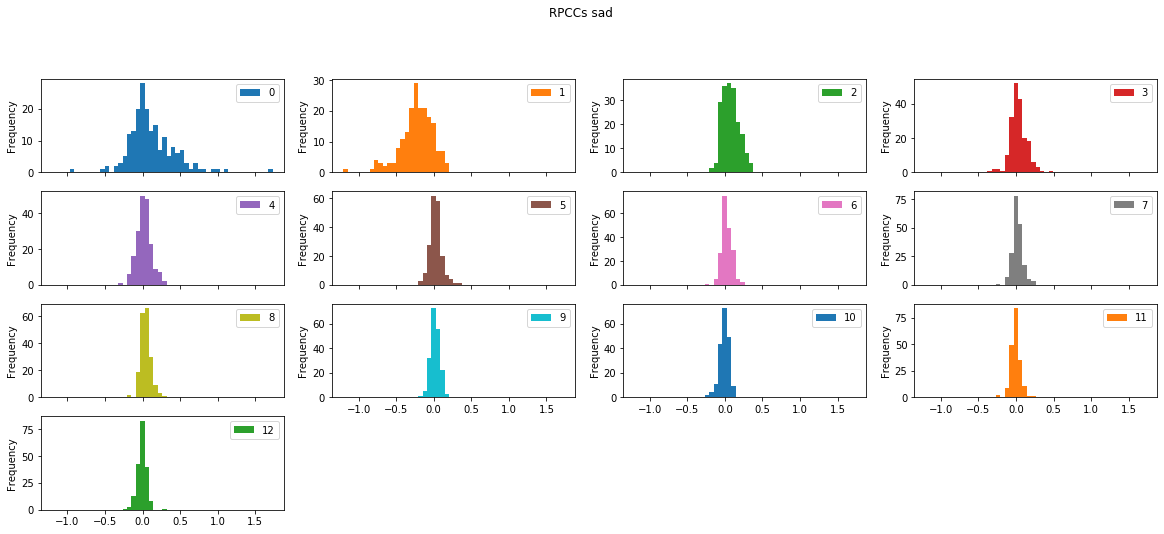

In [10]:
# Sad

df_mfcc_s.plot.hist(subplots=True, layout=(5,4), figsize = (20,10), bins=50, title='MFCCs sad')
plt.show()

df_rpcc_s.plot.hist(subplots=True, layout=(5,4), figsize = (20,10), bins=50, title='RPCCs sad')
plt.show()

Looking at the invidual cepstral coefficient distribution, we note that especially for lower-order coefficients, large skewness is observed. <br>
Left and right skewnes indicates tendency of cepstral coefficient towards lower and higher values, respectively. <br>
Comparing the skewness values in the table below, we can indeed notice tha the lowest cepstral coefficient for the residual phase shows strong left skewness for 'sad' audio signals, whereas the distribution is almost normal for 'happy' audio signals. This can be indicative of feature relevance in emotion classification.

In [11]:
skew_mfcc_happy = pd.DataFrame(mfcc_vec_happy).skew().values
skew_mfcc_sad = pd.DataFrame(mfcc_vec_sad).skew().values
skew_rpcc_happy = pd.DataFrame(rpcc_vec_happy).skew().values
skew_rpcc_sad = pd.DataFrame(rpcc_vec_sad).skew().values

In [12]:
df_skew = pd.DataFrame([skew_mfcc_happy, skew_mfcc_sad, skew_rpcc_happy, skew_rpcc_sad]).T
df_skew.columns = ['mfcc happy', 'mfcc sad', 'rpcc happy', 'rpcc sad']

df_skew

,mfcc happy,mfcc sad,rpcc happy,rpcc sad
0,-1.022746,-1.069697,-0.464691,1.123886
1,-0.678648,-0.710274,-0.694808,-0.987384
2,1.095796,0.132140,0.701238,0.258886
3,1.088723,0.563202,0.484933,0.090531
4,-0.061981,0.143640,0.777893,0.202085
5,0.731515,1.066351,0.517769,0.482330
6,0.087449,0.306809,0.513974,0.074036
7,-0.351409,0.408400,0.307737,0.252054
8,1.042401,0.579302,1.038588,0.316925
9,0.013413,-0.362143,0.373392,-0.012889
